In [81]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [84]:
mydir = "C:\\Users\\Yang\\Desktop\\영진\\학회.동아리\\Growth Hackers\\
경마프로젝트\\DB\\"
crawldata = "crawling data.csv"
# predict = "prediction.csv"
df = pd.read_csv(mydir+crawldata,engine = 'python', index_col = 0,encoding='utf-8')
data = df[['date','round','location','name','rank','dandivi','yeondivi']]
# predict_df = pd.read_csv(mydir + predict,engine = 'python', index_col = 0,encoding='utf-8')

predict = df[['lane']]
data['predict']=predict
data=data[data['location']==0]


C:\Users\Yang\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
gb_data = data.groupby(['date','round','location'])
gb_data = [gb_data.get_group(x) for x in gb_data.groups]


In [90]:
# Game 회수
total_game = len(gb_data)

# 시작 자본
startmoney=1000000
startlist=[startmoney]

# 판돈
import random
bettingmoney = [10000]
for i in range(total_game):
    bettingmoney.append(10000 + int(random.random()*10000))
    
# 총 번 돈
earnmoney = 0

In [91]:
# Game Start!
for i in range(total_game):
    top_rank = gb_data[i][gb_data[i]['rank'].rank()==1]
    predict_rank = gb_data[i][gb_data[i]['predict'].rank()==1]
    
    # 1등이 2마리여서 1.5등인 경우때문에 1등말이 없는 경우를 제거!
    if len(top_rank)==0:
        continue

    # 실제 1등말과 예측 1등말의 이름이 같다면 dandivi만큼 돈 딴다!
    if top_rank.iloc[0]['name'] == predict_rank.iloc[0]['name']:
        earnmoney = earnmoney + bettingmoney[i] * top_rank.iloc[0]['dandivi']
        startmoney = startmoney + bettingmoney[i] * top_rank.iloc[0]['dandivi']
    
    # 돈 못따도 betting money는 감소
    startmoney = startmoney - bettingmoney[i]
    
    # 매 라운드 기록
    startlist.append(startmoney)
    
    # 돈 다쓰면 break
    if startmoney<0:
        print(i, top_rank.iloc[0]['date'])
        break

print('시작자본: ',startlist[0])
print('번 돈: ',earnmoney)
print('쓴 돈: ',sum(bettingmoney))

777 20180415
시작자본:  1000000
번 돈:  10601948.9
쓴 돈:  21623451


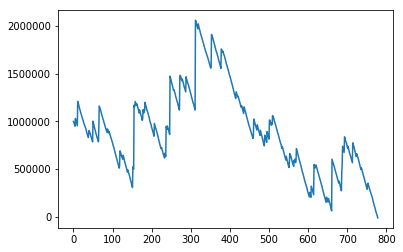

In [92]:
# 내 돈의 증감
from matplotlib import pyplot as plt
plt.plot(startlist)
plt.show()

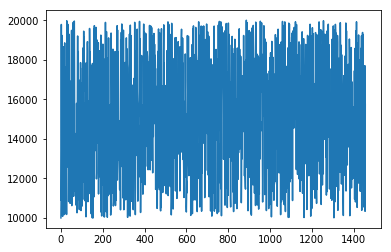

In [89]:
plt.plot(bettingmoney)
plt.show()